In [32]:
def plot_results(history):
    # plot results
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs,acc,'bo',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs,loss,'bo',label = 'Training loss')
    plt.plot(epochs,val_loss,'b',label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [33]:
# Load the IMDB Dataset
from keras.datasets import reuters
from keras import preprocessing
from keras.utils import to_categorical

max_features = 10000
embedding_dim = 100
maxlen = 100

import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old
word_index = reuters.get_word_index()


In [34]:
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_11 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dense_18 (Dense)             (None, 46)                5934      
Total params: 2,286,062
Trainable params: 2,286,062
Non-trainable params: 0
_________________________________________________________________
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 13s 2ms/step - loss: 1.7827 - acc: 0.5530 - val_loss: 1.4211 - val_acc: 0.6678
Epoch 2/10
7185/7185 [==============================] - 10s 1ms/step - loss: 0.89

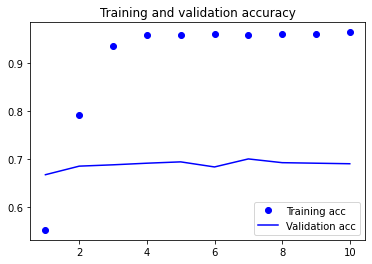

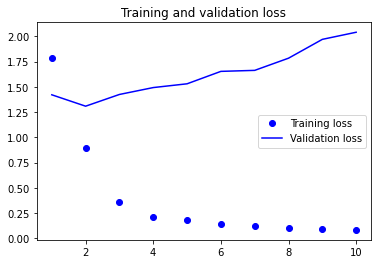

In [35]:
from keras import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

model.add(Embedding(max_features,embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

plot_results(history)

In [36]:
acc = model.evaluate(x_test,y_test)
print(acc)

2246/2246 [==============================] - 1s 566us/step
[2.0542406734354457, 0.6785396260283191]


In [37]:
import os
import numpy as np

glove_dir = "C:/Users/Harsh Vora/Desktop/GloveData"
embeddings_index = {}

f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Found %s words vectors." %len(embeddings_index))

# Build an embedding matrix to load the embedding layer
embedding_matrix = np.zeros((max_features,embedding_dim))

for word,i in word_index.items():
    if i < max_features:
        embeddings_vector = embeddings_index.get(word)
        if embeddings_vector is not None:
            embedding_matrix[i] = embeddings_vector

Found 400000 words vectors.


In [38]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_features,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(46,activation='softmax'))

# load embedding matrix and freez embedding layer weights
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_12 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dense_20 (Dense)             (None, 46)                5934      
Total params: 2,286,062
Trainable params: 1,286,062
Non-trainable params: 1,000,000
_________________________________________________________________


Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 12s 2ms/step - loss: 2.4232 - acc: 0.4333 - val_loss: 2.1209 - val_acc: 0.4496
Epoch 2/10
7185/7185 [==============================] - 8s 1ms/step - loss: 1.6103 - acc: 0.5570 - val_loss: 2.0330 - val_acc: 0.4791
Epoch 3/10
7185/7185 [==============================] - 8s 1ms/step - loss: 1.1559 - acc: 0.6725 - val_loss: 2.5372 - val_acc: 0.4741
Epoch 4/10
7185/7185 [==============================] - 8s 1ms/step - loss: 0.7340 - acc: 0.7918 - val_loss: 2.3191 - val_acc: 0.5058
Epoch 5/10
7185/7185 [==============================] - 8s 1ms/step - loss: 0.4592 - acc: 0.8792 - val_loss: 2.9639 - val_acc: 0.4496
Epoch 6/10
7185/7185 [==============================] - 8s 1ms/step - loss: 0.3239 - acc: 0.9243 - val_loss: 2.8011 - val_acc: 0.4747
Epoch 7/10
7185/7185 [==============================] - 9s 1ms/step - loss: 0.2802 - acc: 0.9363 - val_loss: 3.1282 - val_acc: 0.4825
Epoch 8/10
71

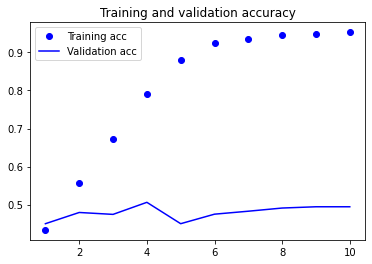

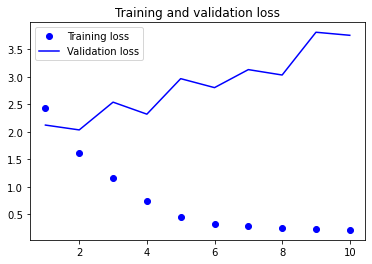

In [39]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)
model.save_weights('pre_trained_glove_model_reuters.h5')

plot_results(history)

In [40]:
acc = model.evaluate(x_test,y_test)
print(acc)

2246/2246 [==============================] - 1s 557us/step
[3.833276497712649, 0.485752448824401]


Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 12s 2ms/step - loss: 0.2243 - acc: 0.9498 - val_loss: 3.5321 - val_acc: 0.4730
Epoch 2/10
7185/7185 [==============================] - 11s 2ms/step - loss: 0.2039 - acc: 0.9550 - val_loss: 3.9737 - val_acc: 0.4964
Epoch 3/10
7185/7185 [==============================] - 10s 1ms/step - loss: 0.1990 - acc: 0.9537 - val_loss: 3.6783 - val_acc: 0.4969
Epoch 4/10
7185/7185 [==============================] - 10s 1ms/step - loss: 0.2026 - acc: 0.9571 - val_loss: 3.6121 - val_acc: 0.4897
Epoch 5/10
7185/7185 [==============================] - 11s 1ms/step - loss: 0.1958 - acc: 0.9577 - val_loss: 4.2176 - val_acc: 0.4897
Epoch 6/10
7185/7185 [==============================] - 11s 2ms/step - loss: 0.1959 - acc: 0.9570 - val_loss: 4.1804 - val_acc: 0.4825
Epoch 7/10
7185/7185 [==============================] - 11s 2ms/step - loss: 0.1817 - acc: 0.9585 - val_loss: 4.1609 - val_acc: 0.4585
Epoch 8

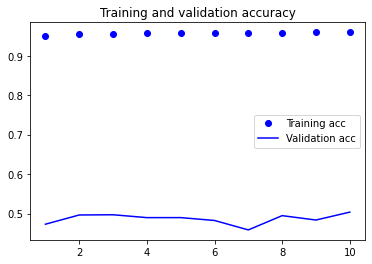

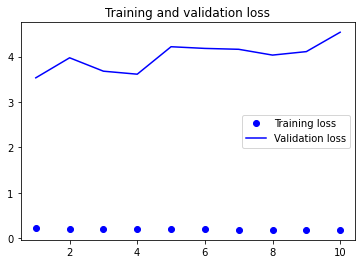

In [41]:
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

plot_results(history)

In [42]:
acc = model.evaluate(x_test,y_test)
print(acc)

2246/2246 [==============================] - 1s 490us/step
[4.571702187759794, 0.5075690116026735]


Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 24s 3ms/step - loss: 2.0405 - acc: 0.4749 - val_loss: 1.7260 - val_acc: 0.5147
Epoch 2/10
7185/7185 [==============================] - 22s 3ms/step - loss: 1.4361 - acc: 0.6125 - val_loss: 1.4487 - val_acc: 0.6427
Epoch 3/10
7185/7185 [==============================] - 22s 3ms/step - loss: 1.0957 - acc: 0.7155 - val_loss: 1.3276 - val_acc: 0.6711
Epoch 4/10
7185/7185 [==============================] - 22s 3ms/step - loss: 0.8631 - acc: 0.7717 - val_loss: 1.3399 - val_acc: 0.6873
Epoch 5/10
7185/7185 [==============================] - 22s 3ms/step - loss: 0.6745 - acc: 0.8225 - val_loss: 1.4009 - val_acc: 0.6422
Epoch 6/10
7185/7185 [==============================] - 22s 3ms/step - loss: 0.5185 - acc: 0.8714 - val_loss: 1.7141 - val_acc: 0.6260
Epoch 7/10
7185/7185 [==============================] - 22s 3ms/step - loss: 0.4035 - acc: 0.8998 - val_loss: 1.4477 - val_acc: 0.7101
Epoch 8

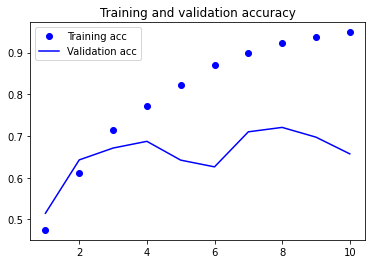

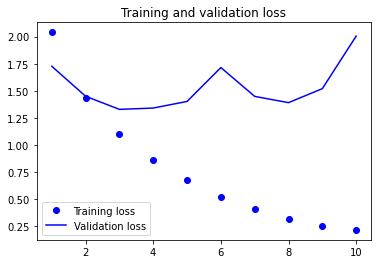

In [43]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,embedding_dim, input_length=maxlen))

model.add(LSTM(64,return_sequences=True))

model.add(Flatten())
model.add(Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

plot_results(history)

In [44]:
acc = model.evaluate(x_test,y_test)
print(acc)

2246/2246 [==============================] - 2s 867us/step
[2.0911011390142535, 0.6349065004717741]


Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 21s 3ms/step - loss: 2.0737 - acc: 0.4447 - val_loss: 1.8383 - val_acc: 0.4597
Epoch 2/10
7185/7185 [==============================] - 17s 2ms/step - loss: 1.5538 - acc: 0.5841 - val_loss: 1.5707 - val_acc: 0.5771
Epoch 3/10
7185/7185 [==============================] - 17s 2ms/step - loss: 1.2774 - acc: 0.6610 - val_loss: 1.4490 - val_acc: 0.6388
Epoch 4/10
7185/7185 [==============================] - 17s 2ms/step - loss: 1.0040 - acc: 0.7358 - val_loss: 1.4705 - val_acc: 0.6522
Epoch 5/10
7185/7185 [==============================] - 17s 2ms/step - loss: 0.8139 - acc: 0.7852 - val_loss: 1.9211 - val_acc: 0.5760
Epoch 6/10
7185/7185 [==============================] - 17s 2ms/step - loss: 0.6685 - acc: 0.8252 - val_loss: 1.4908 - val_acc: 0.6861
Epoch 7/10
7185/7185 [==============================] - 17s 2ms/step - loss: 0.5373 - acc: 0.8578 - val_loss: 1.9170 - val_acc: 0.6110
Epoch 8

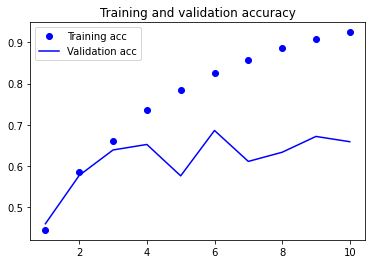

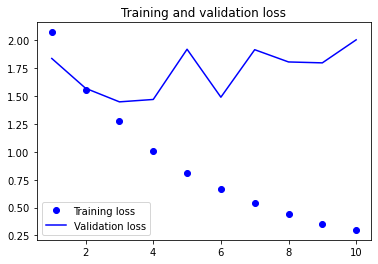

In [45]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,embedding_dim, input_length=maxlen))

model.add(LSTM(32,return_sequences=True))
model.add(LSTM(64,return_sequences=True))

model.add(Flatten())
model.add(Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

plot_results(history)

In [46]:
acc = model.evaluate(x_test,y_test)
print(acc)

2246/2246 [==============================] - 3s 1ms/step
[2.066111273565997, 0.6424755120479094]
